# Bienvenidos a la 6ta práctica de Física Computacional 2024-2 
* Alumna Ayudante: Valentina Santelices
    * Correo: vsantelices2021@udec.cl
* Alumno Ayudante: Juan Ortega
    * Correo: juortega2019@udec.cl

# Introducción al Método de Euler

El método de Euler es un método numérico sencillo para resolver ecuaciones diferenciales ordinarias (EDOs) de la forma:

$$
\frac{dy}{dx} = f(x, y)
$$

Este método proporciona una solución aproximada en puntos discretos. Se basa en la idea de aproximar la pendiente de la función $ y(x) $ usando la derivada en un punto conocido.

## Procedimiento del Método de Euler

Dado un valor inicial $ y(x_0) = y_0 $, se estima el valor de $ y $ en los siguientes puntos utilizando la fórmula:

$$
y_{n+1} = y_n + h \cdot f(x_n, y_n)
$$

Donde:

- $ h $ es el tamaño de paso, definido como:

$$
h = \frac{x_f - x_0}{n}
$$

- $ f(x_n, y_n) $ es la derivada de $ y $ evaluada en el punto $ (x_n, y_n) $.
- $ y_n $ es el valor aproximado de $ y $ en el paso $ n $.
- $ x_n $ es el valor correspondiente de $ x $ en el paso $ n $.



# Ejemplo 1: Calculemos la EDO  y' = $e^{-3x}$ - 2y  con condición inicial y(0) = 1

In [1]:
import sympy as sp

# Definimos las variables simbólicas
x = sp.symbols('x')
y = sp.Function('y')(x)

# Definimos la ecuación diferencial: y' = e^(-3x) - 2y
edo = sp.Eq(y.diff(x), sp.exp(-3*x) - 2*y)

# Resolvemos la ecuación diferencial con la condición inicial y(0) = 1
ci = {y.subs(x, 0): 1}
sol_analitica = sp.dsolve(edo, y, ics=ci)
# Mostramos la solución con la condición inicial aplicada
sol_analitica


Eq(y(x), (2 - exp(-x))*exp(-2*x))

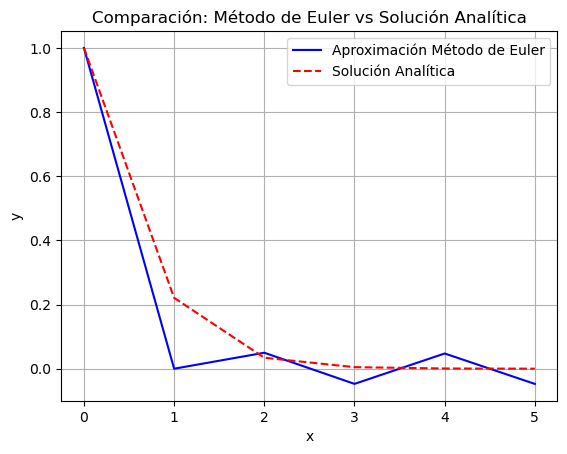

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función f'(x,y) que representa la derivada de y respecto a x
def dF(x, y):  
    # La ecuación diferencial a resolver es f' = exp(-3x) - 2y
    return np.exp(-3*x) - 2*y 

# Solución analítica de la EDO
def solucion_analitica(x):
    return (2 - np.exp(-x)) * np.exp(-2*x)

# Condiciones iniciales
x0 = 0    # Valor inicial de x
y0 = 1    # Valor inicial de y
xf = 5    # Valor final de x (intervalo [x0, xf])
n = 5   # Número de pasos (divisiones del intervalo)

# Calculamos el tamaño de paso (h)
h = (xf - x0) / n

# Inicializamos los arrays para almacenar los valores de x e y
x = np.array([x0])
y = np.array([y0])

# Implementamos el método de Euler
for i in range(1, n + 1):   
    # Calculamos el siguiente valor de y usando la fórmula de Euler: y_n+1 = y_n + h * f'(x_n, y_n)
    yn = y0 + h * dF(x0, y0)
    
    # Actualizamos x y y para el siguiente paso
    x0 = x0 + h
    y0 = yn

    # Almacenamos los nuevos valores en los arrays
    x = np.append(x, x0)
    y = np.append(y, y0)

# Calculamos la solución analítica para los mismos valores de x
y_analitica = solucion_analitica(x)

# Graficamos ambos resultados
plt.figure()
plt.plot(x, y, label='Aproximación Método de Euler', color='b')
plt.plot(x, y_analitica, label='Solución Analítica', linestyle='--', color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparación: Método de Euler vs Solución Analítica')
plt.grid(True)
plt.legend()
plt.show()


# Actividad: Grafiquemos $ y(x) $ en el intervalo $[0, 5]$ dado que $ y $ satisface cada una de las siguientes ecuaciones diferenciales:

a) 
$
\frac{dy}{dx} = -y, \quad y(0) = 2
$

b) 
$
\frac{dy}{dx} - \left( \frac{2}{x+1} \right)y = x, \quad y(0) = 0
$

c) 
$
\frac{dy}{dx} = y(1 - y), \quad y(0) = \frac{1}{2}
$

# Desarrollamos el ejercicio c)

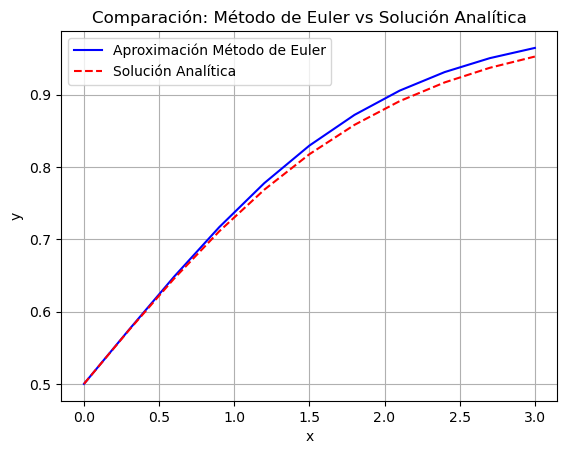

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función f'(x,y) que representa la derivada de y respecto a x
def dF(x, y):  
    # La ecuación diferencial a resolver es f' = y(1-y)
    return y*(1-y)  

# Solución analítica de la EDO
def solucion_analitica(x):
    return (1/(1+np.exp(-x))) 

# Condiciones iniciales
x0 = 0    # Valor inicial de x
y0 = 1/2    # Valor inicial de y
xf = 3    # Valor final de x (intervalo [x0, xf])
n = 10   # Número de pasos (divisiones del intervalo)

# Calculamos el tamaño de paso (h)
h = (xf - x0) / n

# Inicializamos los arrays para almacenar los valores de x e y
x = np.array([x0])
y = np.array([y0])

# Implementamos el método de Euler
for i in range(1, n + 1):   
    # Calculamos el siguiente valor de y usando la fórmula de Euler: y_n+1 = y_n + h * f'(x_n, y_n)
    yn = y0 + h * dF(x0, y0)
    
    # Actualizamos x y y para el siguiente paso
    x0 = x0 + h
    y0 = yn

    # Almacenamos los nuevos valores en los arrays
    x = np.append(x, x0)
    y = np.append(y, y0)

# Calculamos la solución analítica para los mismos valores de x
y_analitica = solucion_analitica(x)

# Graficamos ambos resultados
plt.figure()
plt.plot(x, y, label='Aproximación Método de Euler', color='b')
plt.plot(x, y_analitica, label='Solución Analítica', linestyle='--', color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparación: Método de Euler vs Solución Analítica')
plt.grid(True)
plt.legend()
plt.show()


# Introducción a los métodos de Runge-Kutta
El método de Euler, que implementamos en el código anterior, es una técnica de primer orden para aproximar la solución de una ecuación diferencial ordinaria (EDO). Aunque es fácil de entender e implementar, no es muy preciso a menos que utilicemos un número grande de pasos, lo que incrementa el costo computacional.

Para mejorar la precisión de las soluciones sin aumentar excesivamente el número de pasos, se utilizan los métodos de Runge-Kutta (RK), que son más avanzados y ofrecen mayor exactitud. En particular, vamos a hablar de los métodos de Runge-Kutta de 2do, 3er y 4to orden.

Los métodos de Runge-Kutta logran una mejor aproximación a la solución de la EDO al evaluar la función f(x,y) en varios puntos dentro del intervalo de integración, y luego promedian estos valores de manera ponderada para obtener una mejor estimación del valor de y.

# Método de Runge-Kutta de 2do orden (RK2)
El método de Runge-Kutta de segundo orden (RK2) utiliza dos estimaciones de la pendiente, una al principio del intervalo y otra en el medio del intervalo. Su fórmula es la siguiente:

$$
y_{n+1} = y_n + h\cdot k_2
$$

donde: 

$$
k_1 = f(x_n,y_n) 
$$
$$
k_2 = f(x_n+h,y_n+h\cdot k_1)
$$

Este método es más preciso que el de Euler, ya que toma en cuenta una estimación intermedia dentro del intervalo h.

# Método de Runge-Kutta de 3er orden (RK3)
El método de Runge-Kutta de tercer orden (RK3) es una aproximación aún más precisa que el de segundo orden. Evalúa la función en tres puntos diferentes dentro del intervalo. Su fórmula es la siguiente:

$$
y_{n+1} = y_n+h \cdot \left( \frac{1}{6}k_1 + \frac{4}{6}k_2 + \frac{1}{6}k_3 \right)
$$

donde: 

$$
k_1 = f(x_n,y_n) 
$$
$$
k_2 = f(x_n+\frac{h}{2},y_n+\frac{h}{2}\cdot k_1)
$$
$$
k_3 = f(x_n+h,y_n-h\cdot k_1+2h\cdot k_2)
$$

Este método es un buen compromiso entre precisión y costo computacional, siendo más preciso que el método RK2.

# Método de Runge-Kutta de 4to orden (RK4)

El método de Runge-Kutta de cuarto orden (RK4) es el más popular debido a su precisión y eficiencia. Evalúa la función en cuatro puntos dentro del intervalo, y su fórmula es la siguiente:

$$
y_{n+1} = y_n + \frac{h}{6} (k_1 + 2k_2 + 2k_3 + k_4)
$$

Donde:

- $k_1 = f(x_n, y_n)$
- $k_2 = f\left(x_n + \frac{h}{2}, y_n + \frac{h}{2} k_1\right)$
- $k_3 = f\left(x_n + \frac{h}{2}, y_n + \frac{h}{2} k_2\right)$
- $k_4 = f(x_n + h, y_n + h k_3)$

El método RK4 es mucho más preciso que el de Euler y que los métodos RK2 y RK3, y es ampliamente utilizado en la resolución numérica de EDOs.


# Apliquemoslo al c) visto anteriormente: 
c) 
$
\frac{dy}{dx} = y(1 - y), \quad y(0) = \frac{1}{2}
$

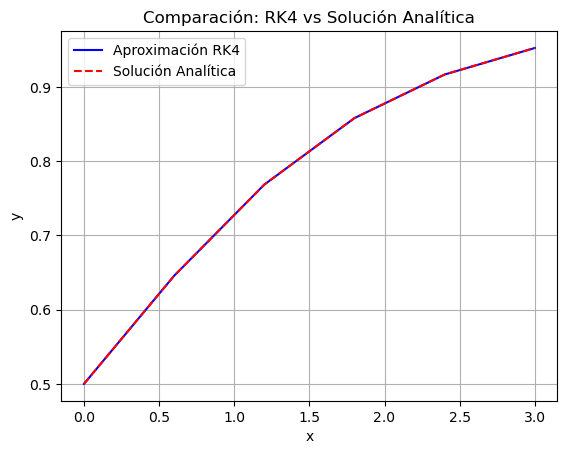

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función f'(x, y) que representa la derivada de y respecto a x
def dF(x, y):  
    return y * (1 - y)

# Solución analítica de la EDO
def solucion_analitica(x):
    return 1 / (1 + np.exp(-x)) 

# Método de Euler
def euler(x0, y0, h, n):
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    x[0] = x0
    y[0] = y0
    for i in range(1, n+1):
        y[i] = y[i-1] + h * dF(x[i-1], y[i-1])
        x[i] = x[i-1] + h
    return x, y

# Método de Runge-Kutta de segundo orden (RK2)
def rk2(x0, y0, h, n):
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    x[0] = x0
    y[0] = y0
    for i in range(1, n+1):
        k1 = dF(x[i-1], y[i-1])
        k2 = dF(x[i-1] + h, y[i-1] + h * k1)
        y[i] = y[i-1] + h * k2
        x[i] = x[i-1] + h
    return x, y

# Método de Runge-Kutta de cuarto orden (RK4)
def rk4(x0, y0, h, n):
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    x[0] = x0
    y[0] = y0
    for i in range(1, n+1):
        k1 = dF(x[i-1], y[i-1])
        k2 = dF(x[i-1] + h/2, y[i-1] + h/2 * k1)
        k3 = dF(x[i-1] + h/2, y[i-1] + h/2 * k2)
        k4 = dF(x[i-1] + h, y[i-1] + h * k3)
        y[i] = y[i-1] + h/6 * (k1 + 2 * k2 + 2 * k3 + k4)
        x[i] = x[i-1] + h
    return x, y


# Parámetros iniciales
x0 = 0      # Valor inicial de x
y0 = 1/2    # Valor inicial de y
xf = 3      # Valor final de x
n = 5     # Número de pasos
h = (xf - x0) / n  # Tamaño de paso

# Elegimos el método a usar: euler, rk2, rk3, o rk4
x, y = rk4(x0, y0, h, n)  # Cambia rk4 por el método deseado (euler, rk2, rk3, rk4)

# Calculamos la solución analítica para los mismos valores de x
y_analitica = solucion_analitica(x)

# Graficamos ambos resultados
plt.figure()
plt.plot(x, y, label='Aproximación RK4', color='b')
plt.plot(x, y_analitica, label='Solución Analítica', linestyle='--', color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparación: RK4 vs Solución Analítica')
plt.grid(True)
plt.legend()
plt.show()
